## Stimuli for Psychophysics Experiments based on temporal fourier representation

In [8]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 200} #plotting pretty

import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.fftpack
import scipy.signal
from scipy import interpolate
#from tqdm import tqdm_notebook
import imp as imp

import utils.getstim as getstim
import utils.imtools as imtools
import utils.fouriertools as ftools
import utils.wavelettools as wtools

In [13]:
imp.reload(getstim)
imp.reload(ftools)

stim_px_w = 1080
stim_px_h = 1080
stim_secs = 1

#calc degrees and cpd
stim_deg = 2
stim_cpd = (stim_px_w/2)/stim_deg

#calc frames per second
stim_fps = 60
stim_cps = stim_fps/2 #this is our nyquist
stim_frames = stim_fps * stim_secs

print(f'Max stimulus resolution when viewed at {stim_deg}°: {stim_cpd:.1f} CPD')
cut_offs = np.arange(1,stim_cps, stim_cps//5)
#cut_offs = [np.sqrt(2)*stim_fps, stim_fps, 250, 220, 200, 180, 150, 120, 100, 50, 10, 5, 1]
step_stim = getstim.step_stim(stim_px_w, stim_px_h, len_frames=stim_frames)
randstim = np.random.rand(*np.shape(step_stim))
randstim = imtools.rescale_255(randstim)

getstim.generate_temporal_filtered_stims(randstim, stim_fps, cut_offs, filt='sharp', stim_type='randnoise')
getstim.generate_temporal_filtered_stims(step_stim, stim_fps, cut_offs, filt='sharp', stim_type='stepfun')
getstim.generate_temporal_filtered_stims(step_stim, stim_fps, cut_offs, filt='cosine_step', stim_type='stepfun')
getstim.generate_temporal_filtered_stims(step_stim, stim_fps, cut_offs, filt='gauss_step', stim_type='stepfun')
getstim.generate_temporal_filtered_stims(step_stim, stim_fps, cut_offs, filt='gauss_taper', stim_type='stepfun')

Max stimulus resolution when viewed at 2°: 270.0 CPD
Wrote filtered_stims/temporal/randnoise_sharp_60fps_1cut/frame_60.png
Wrote filtered_stims/temporal/randnoise_sharp_60fps_7cut/frame_60.png
Wrote filtered_stims/temporal/randnoise_sharp_60fps_13cut/frame_60.png
Wrote filtered_stims/temporal/randnoise_sharp_60fps_19cut/frame_60.png
Wrote filtered_stims/temporal/randnoise_sharp_60fps_25cut/frame_60.png


/home/vasha/research/wavelet_stim/utils/fouriertools.py:109: RuntimeWarning: invalid value encountered in true_divide
  filtered_ft /= np.max(filtered_ft)
/home/vasha/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


Wrote filtered_stims/temporal/stepfun_sharp_60fps_1cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_sharp_60fps_7cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_sharp_60fps_13cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_sharp_60fps_19cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_sharp_60fps_25cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_cosine_step_60fps_1cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_cosine_step_60fps_7cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_cosine_step_60fps_13cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_cosine_step_60fps_19cut/frame_60.png


/home/vasha/research/wavelet_stim/utils/fouriertools.py:158: UserWarning: Zero point is beyond Nyquist - Nothing is completally cuttoff.
  warnings.warn('Zero point is beyond Nyquist - Nothing is completally cuttoff.')


Wrote filtered_stims/temporal/stepfun_cosine_step_60fps_25cut_warn/frame_60.png


/home/vasha/research/wavelet_stim/utils/fouriertools.py:172: UserWarning: Taper Top Negative - Won't reach full contrast.
  warnings.warn('Taper Top Negative - Won\'t reach full contrast.')
/home/vasha/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1099: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


Wrote filtered_stims/temporal/stepfun_gauss_step_60fps_1cut_warn/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_step_60fps_7cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_step_60fps_13cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_step_60fps_19cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_step_60fps_25cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_taper_60fps_1cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_taper_60fps_7cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_taper_60fps_13cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_taper_60fps_19cut/frame_60.png
Wrote filtered_stims/temporal/stepfun_gauss_taper_60fps_25cut/frame_60.png


()

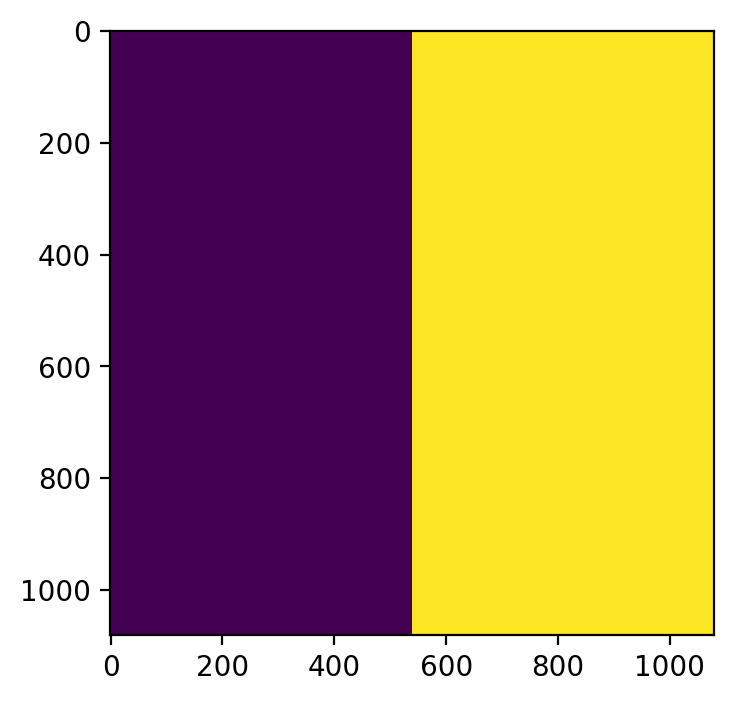

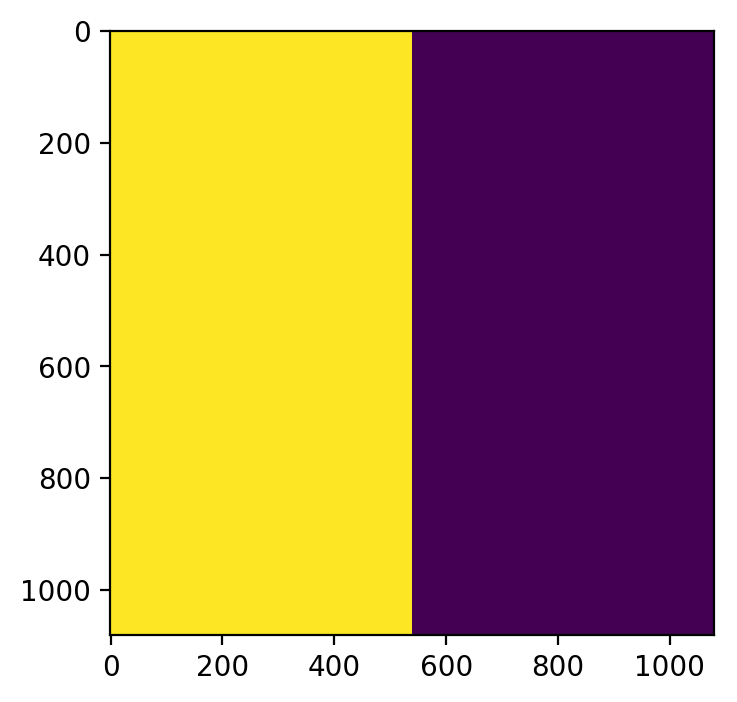

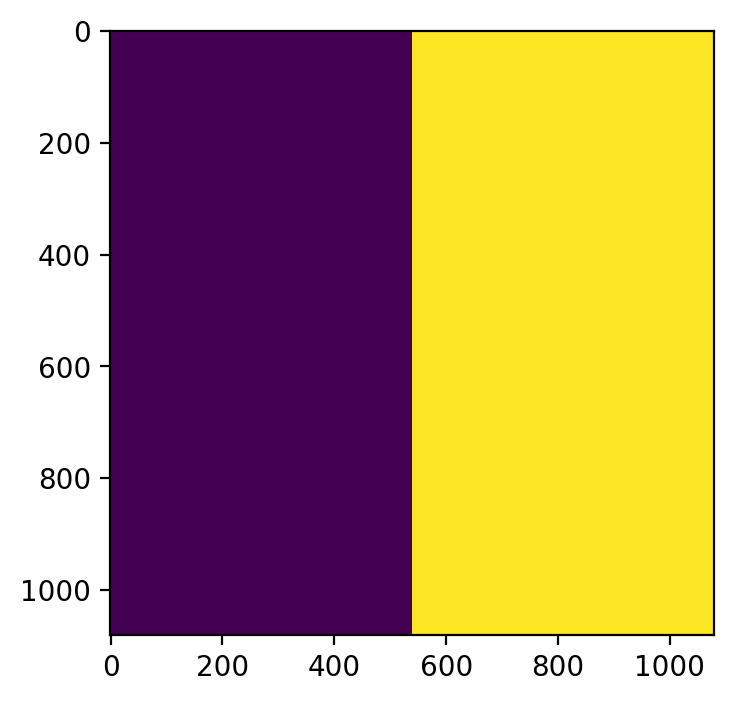

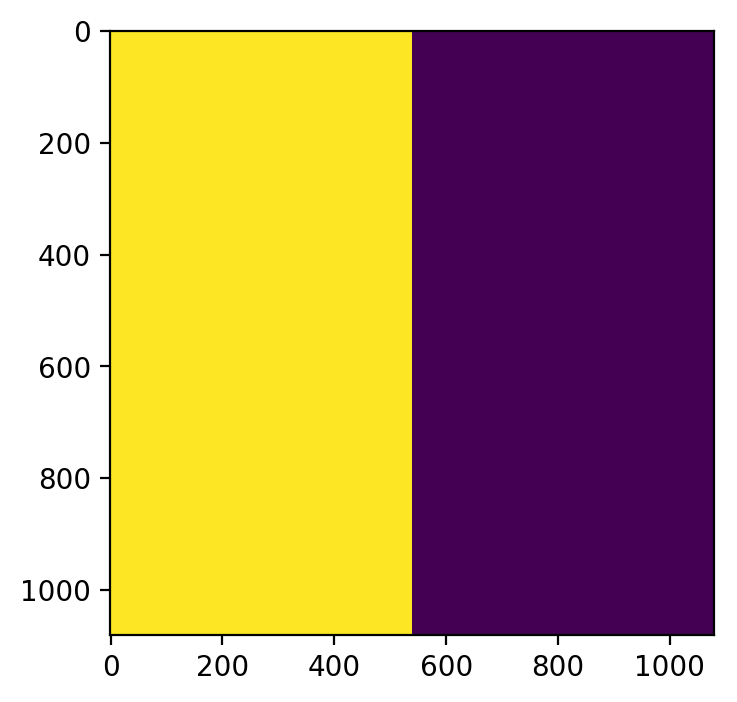

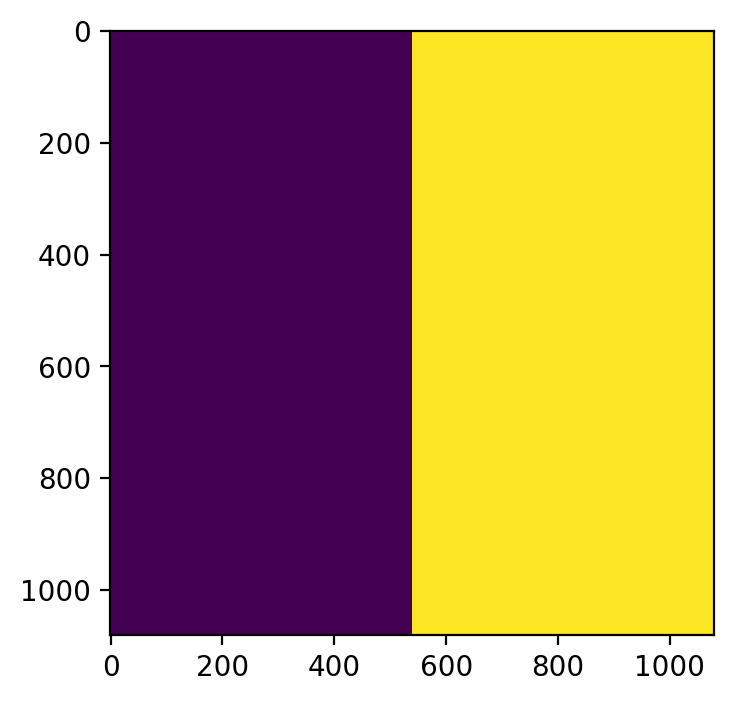

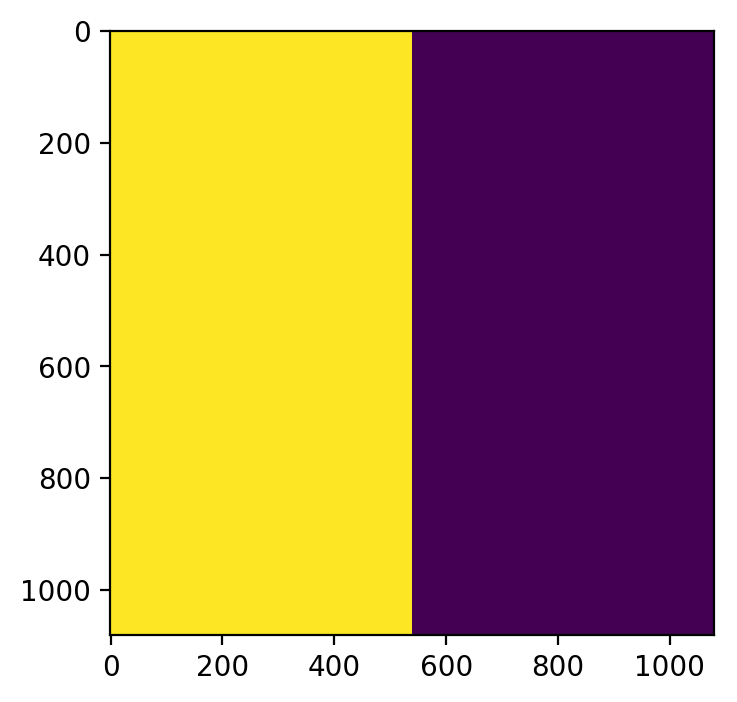

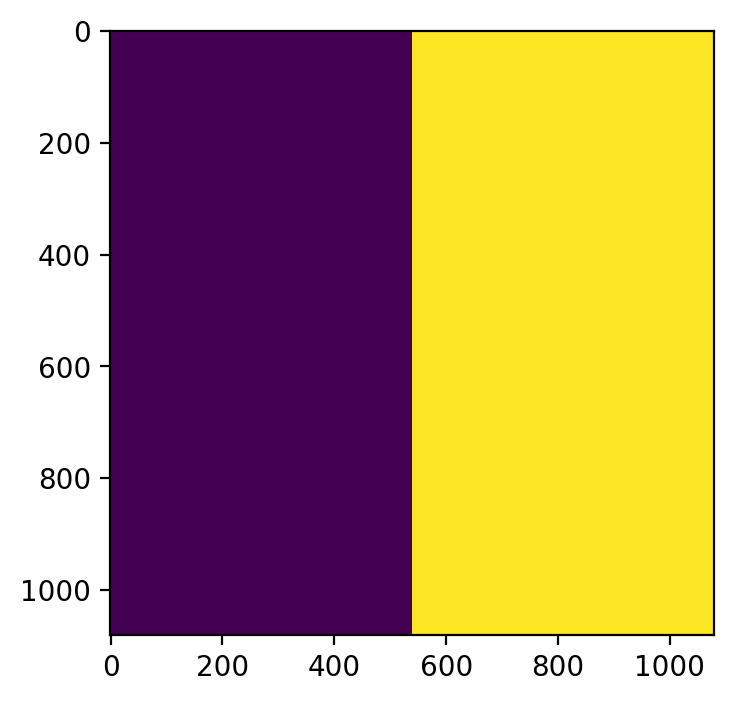

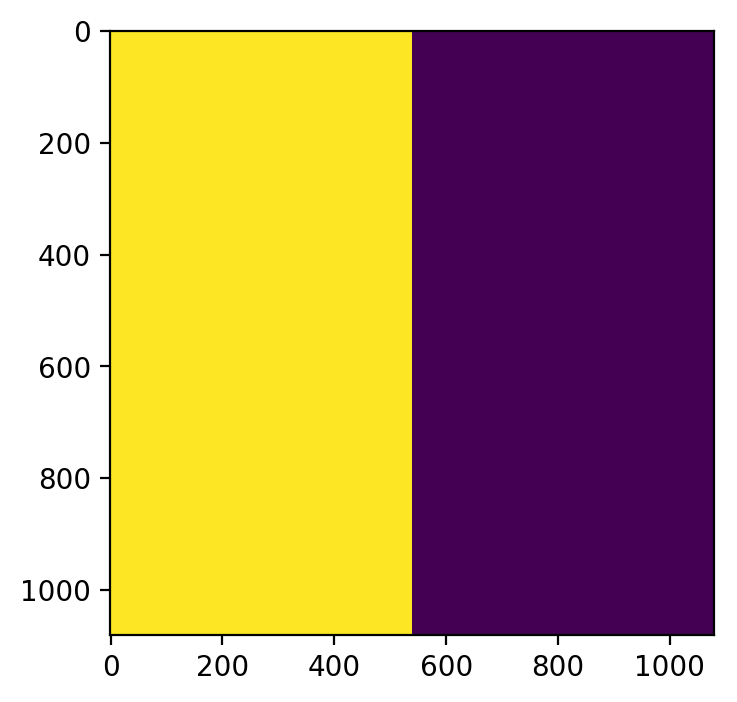

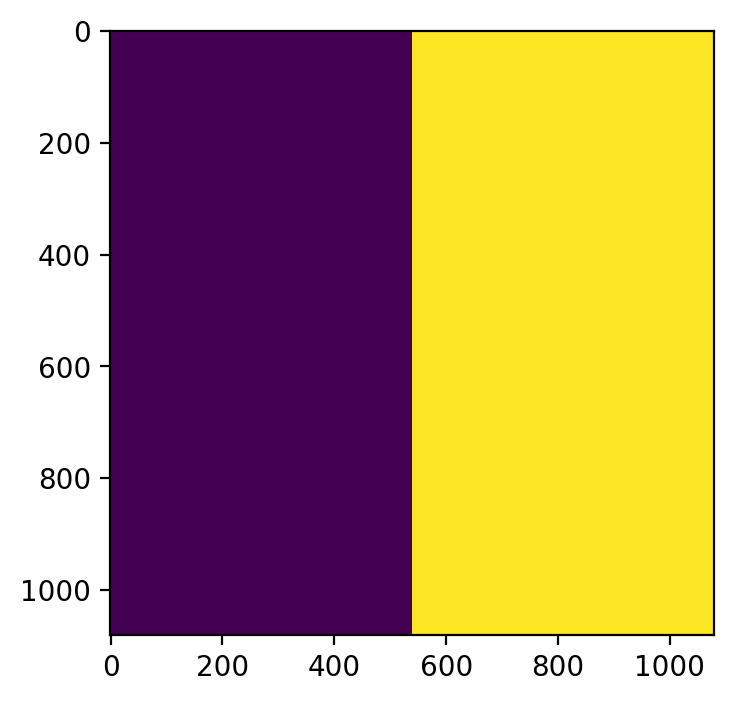

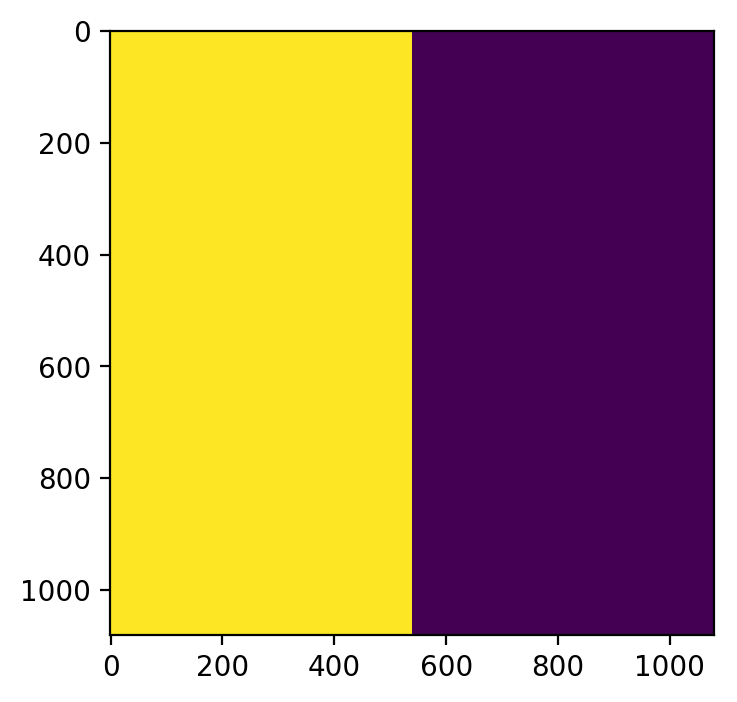

In [3]:
for frame in step_stim:
    plt.imshow(frame)
    plt.show()

In [4]:
imp.reload(getstim)
stim_px_w = 1080
stim_px_h = 1080

#calc degrees and cpd
stim_deg = 2
stim_cpd = (stim_px_w/2)/stim_deg
print(f'Max stimulus resolution when viewed at {stim_deg}°: {stim_cpd:.1f} CPD')

Max stimulus resolution when viewed at 2°: 270.0 CPD


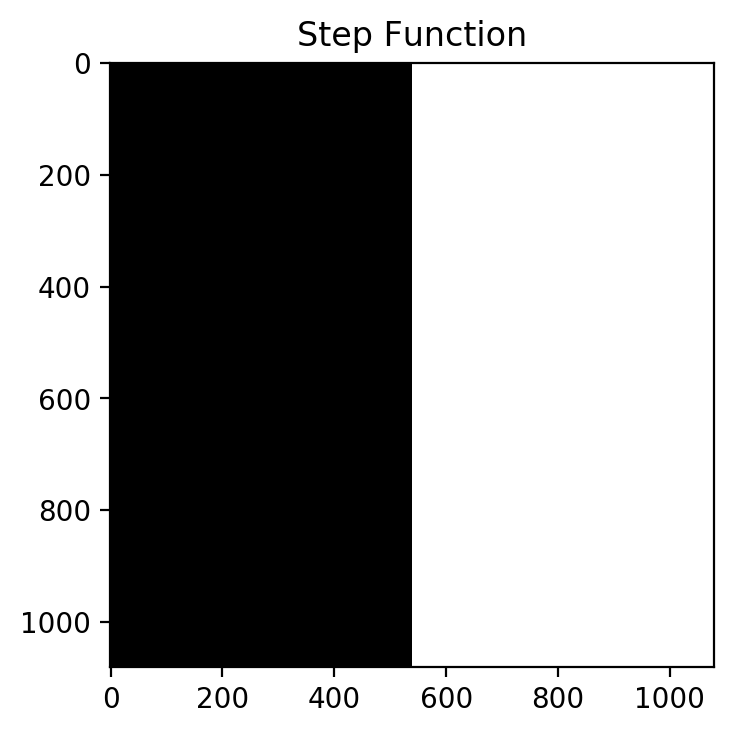

In [5]:
# Step function
#stim_step = np.hstack((np.ones((stim_pix, stim_pix//2)),
                       #np.zeros((stim_pix, stim_pix//2))))
stim_step = getstim.step_stim(stim_px_w, stim_px_h, orient=1, stepdn=True)
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(stim_step, cmap='Greys_r')
ax.set_title('Step Function')
plt.show()

/home/vasha/research/wavelet_stim/utils/imtools.py:13: UserWarning: Cropped and resized image from (620, 826) to (1080, 1080)
  warnings.warn(f'Cropped and resized image from {img.shape} to {img_out.shape}')


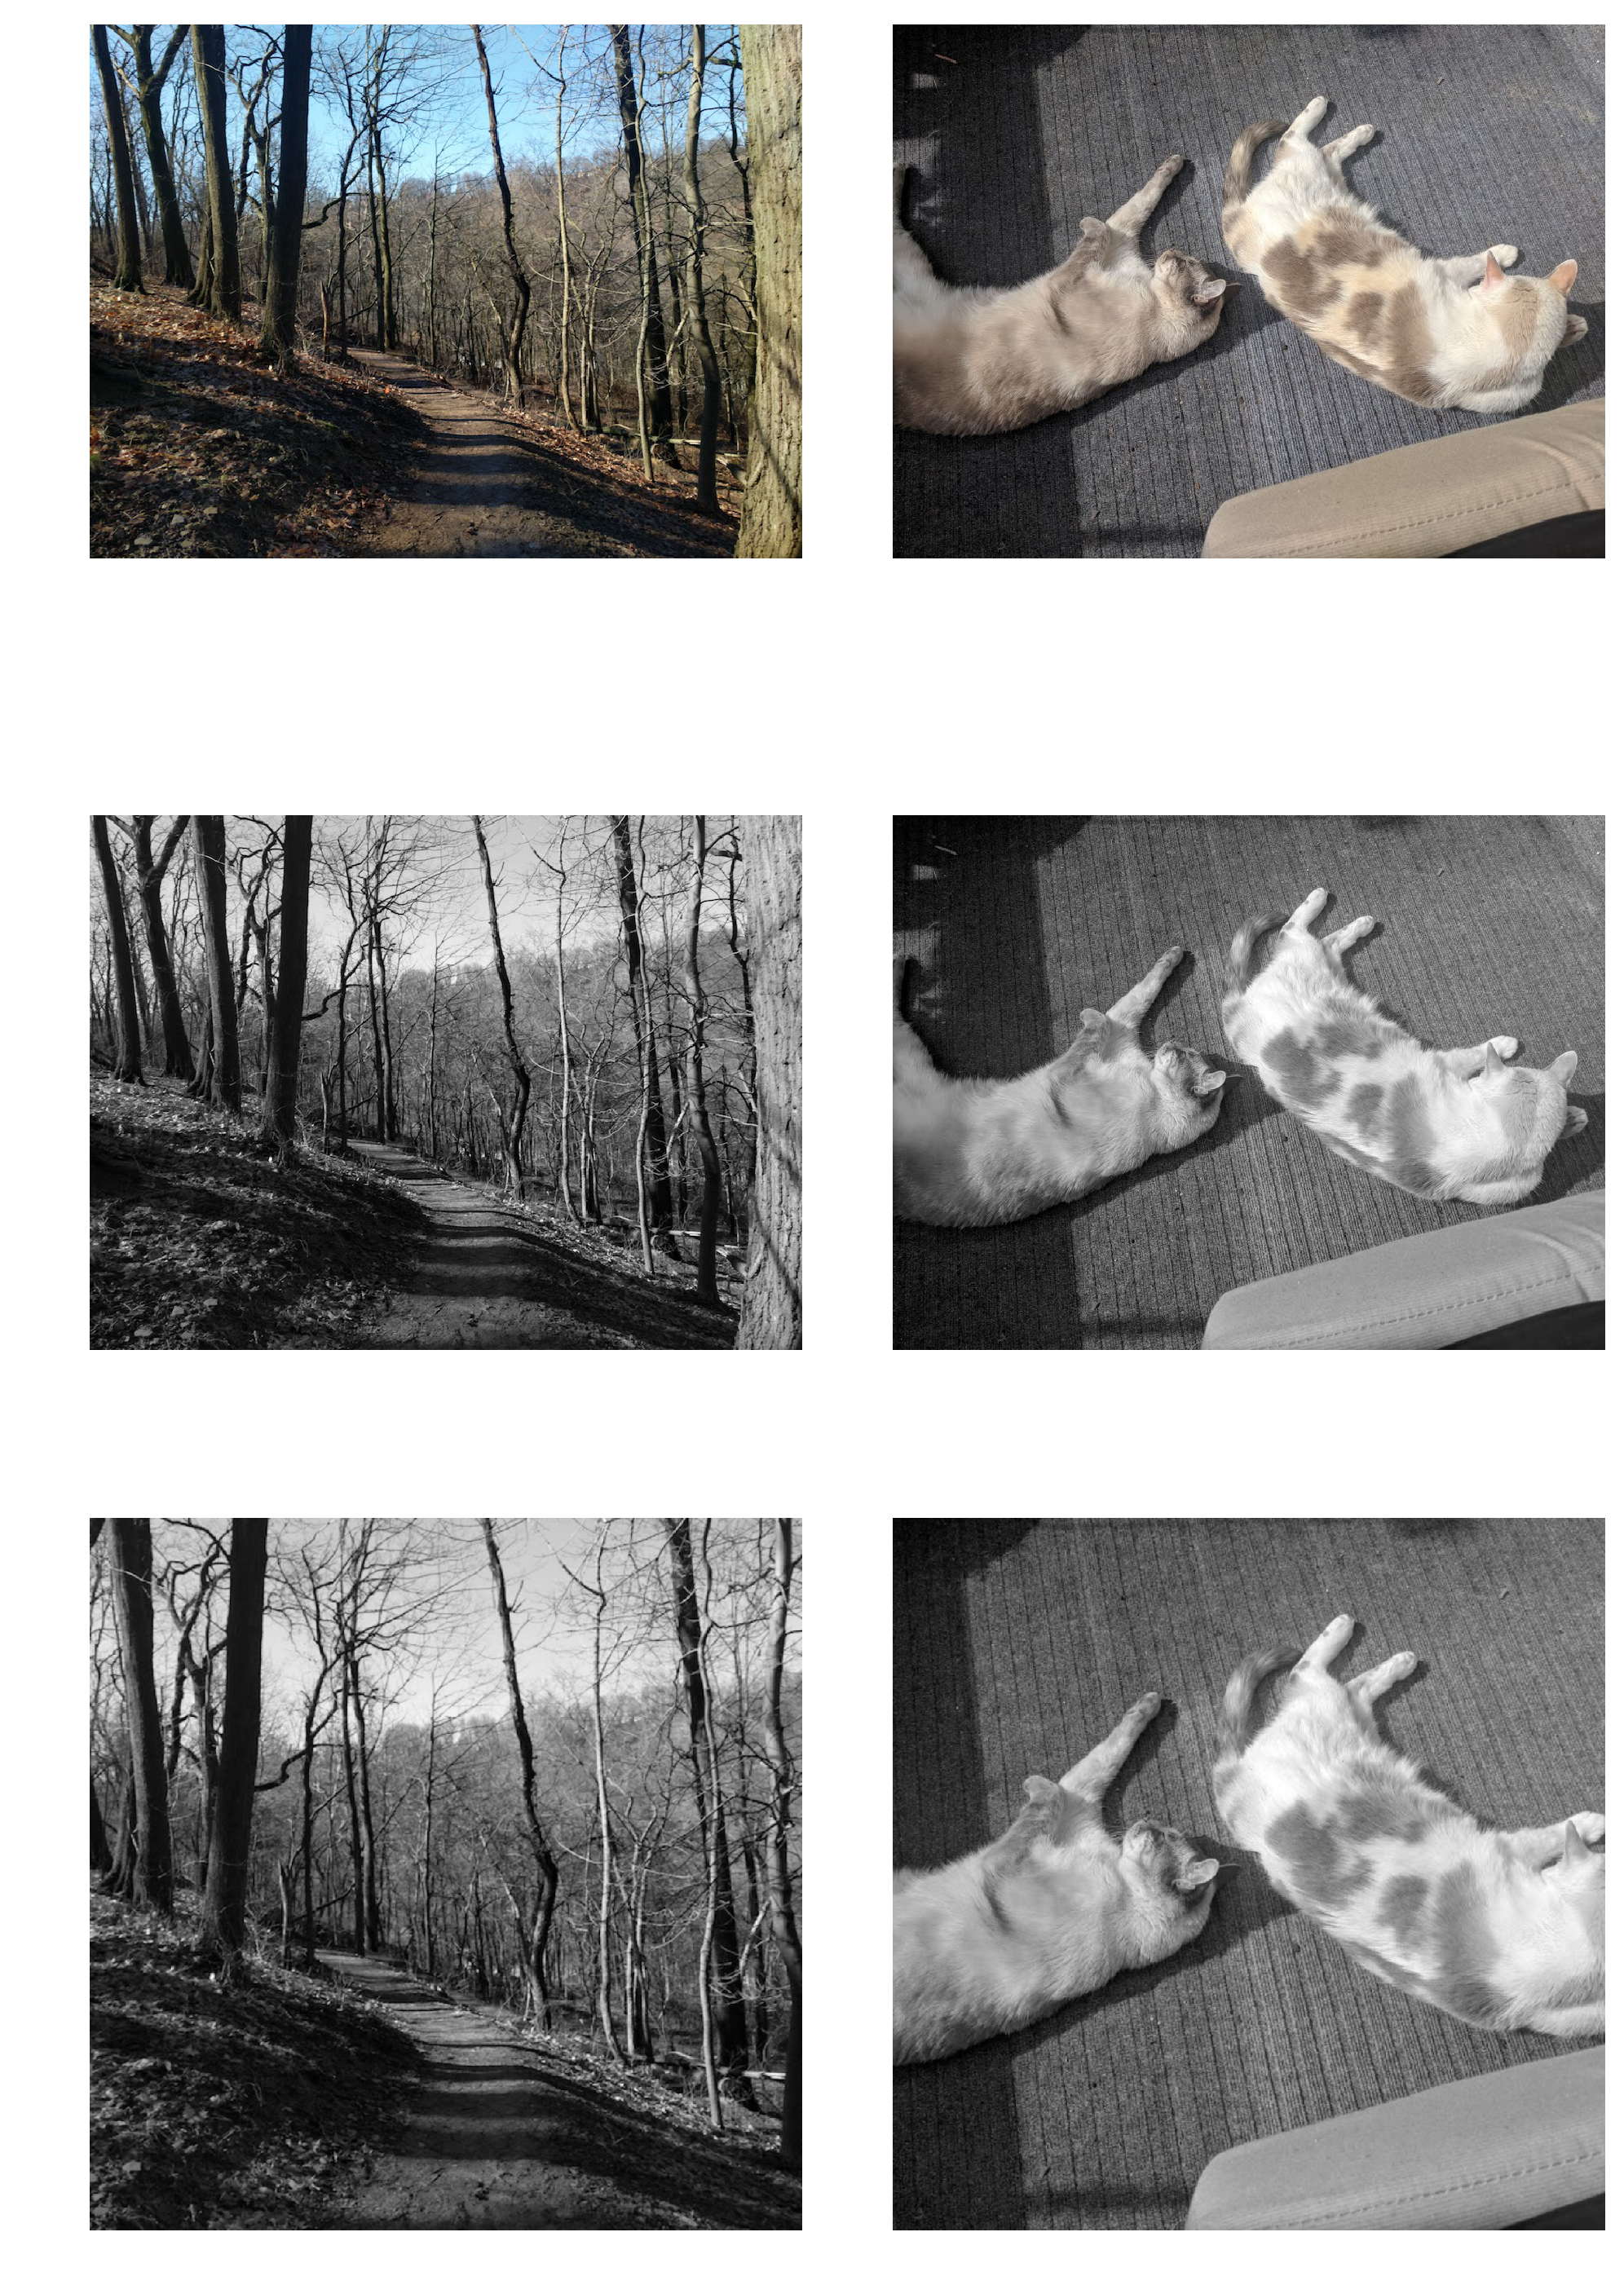

In [6]:
imp.reload(imtools)
# Load images
trail = imageio.imread(os.path.join('ims', 'trail.jpg'))
cats = imageio.imread(os.path.join('ims', 'cats.jpg'))

trail_gray = imtools.rgb2gray(trail)
cats_gray = imtools.rgb2gray(cats)

stim_trail = imtools.cropnresize(trail_gray, (stim_px_h,stim_px_w))
stim_cats = imtools.cropnresize(cats_gray,(stim_px_h,stim_px_w))

f, ax = plt.subplots(3, 2, figsize=(10, 15))
ax[0, 0].imshow(trail)
ax[0, 1].imshow(cats)
ax[1, 0].imshow(trail_gray, cmap='gray')
ax[1, 1].imshow(cats_gray, cmap='gray')
ax[2, 0].imshow(stim_trail, cmap='gray')
ax[2, 1].imshow(stim_cats, cmap='gray')
for r in range(ax.shape[0]):
    for c in range(ax.shape[1]):
        ax[r, c].axis('off')
plt.tight_layout()
plt.show()

In [7]:
stim_sharp_filt = getstim.generate_filtered_stims(stim_cats, stim_deg, cut_offs, filt='sharp', stim_type='cats')
stim_cosinestep_filt = getstim.generate_filtered_stims(stim_cats, stim_deg, cut_offs, filt='cosine_step', stim_type='cats')
stim_gausstep_filt = getstim.generate_filtered_stims(stim_cats, stim_deg, cut_offs, filt='gauss_step', stim_type='cats')
stim_gaustaper_filt = getstim.generate_filtered_stims(stim_cats, stim_deg, cut_offs, filt='gauss_taper', stim_type='cats')

AttributeError: module 'utils.getstim' has no attribute 'generate_filtered_stims'

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
img, mag, phase, filt, warn_flag = ftools.fft_lowpass(stim_trail, 30, stim_cpd)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Reconstructed image')
ax[1].imshow(np.log(mag), cmap='gray')
ax[1].set_title('FFT log magnitude')
ax[2].imshow(phase, cmap='gray')
ax[2].set_title('FFT phase')
for c in range(ax.shape[0]):
    ax[c].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Visualize the FFT magnitudes and phases for different cutoffs
cutoffs = [np.sqrt(2)*stim_cpd, stim_cpd, 60, 30, 10, 5, 1]
for idx, cut in enumerate(cutoffs):
    f, ax = plt.subplots(1, 3, figsize=(15, 5))
    img, mag, phase, filt, warn_flag = ftools.fft_lowpass(stim_cats, cut, stim_cpd)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Reconstructed image')
    ax[1].imshow(np.log(mag), cmap='gray')
    ax[1].set_title('FFT log magnitude')
    ax[2].imshow(phase, cmap='gray')
    ax[2].set_title('FFT phase')
    for c in range(ax.shape[0]):
        ax[c].axis('off')
    plt.suptitle(f'Cutoff: {cut} CPD', y=1.025)
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize reconstuctions for different images
cutoffs = [np.sqrt(2)*stim_cpd, stim_cpd, 60, 30, 10, 5, 1]
for idx, cut in enumerate(cutoffs):
    f, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(ftools.fft_lowpass(stim_step, cut, stim_cpd)[0], cmap='gray')
    ax[1].imshow(ftools.fft_lowpass(stim_trail, cut, stim_cpd)[0], cmap='gray')
    ax[2].imshow(ftools.fft_lowpass(stim_cats, cut, stim_cpd)[0], cmap='gray')
    for c in range(ax.shape[0]):
        ax[c].axis('off')
    plt.suptitle(f'Cutoff: {cut} CPD')
    plt.tight_layout()
    plt.show()

In [ ]:
imp.reload(ftools)
# Visualize the FFT magnitudes and phases for different cutoffs
cutoffs = [np.sqrt(2)*stim_cpd, stim_cpd, 60, 30, 10, 5, 1]

for idx, cut in enumerate(cutoffs):
    f, ax = plt.subplots(1, 3, figsize=(15, 5))
    img, mag, phase, scale, warn_flag = ftools.fft_lowpass(stim_cats, cut, stim_cpd,
                                               filt_name='cosine_step')
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Reconstructed image')
    im = ax[1].imshow(np.log(mag), cmap='gray')
    f.colorbar(im, ax=ax[1])
    ax[1].set_title('FFT log magnitude')
    #print(scale.shape)
    #ax[2] = plt.hist(scale.flatten(),bins=100);
    im = ax[2].imshow(scale)
    #f.colorbar(im, ax=ax[2])
    #ax[2].imshow(phase, cmap='gray')
    #ax[2].set_title('FFT phase')
    #for c in range(ax.shape[0]):
    #    ax[c].axis('off')
    plt.suptitle(f'Cutoff: {cut} CPD', y=1.025)
    plt.tight_layout()
    plt.show()